In [202]:
import pandas as pd
from gensim.matutils import corpus2csc
import numpy as np
import pickle
from importlib import reload
import ppmi_svd
reload(ppmi_svd)
import matplotlib.pyplot as plt
import requests
import json
import networkx as nx

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [175]:
main_text_dict = pickle.load(open("../data/large_files/tlp_main_text_dict.pickle", "rb"))
dct = pickle.load(open("../data/tlp_dct.pickle", "rb"))
corpus = pickle.load(open("../data/tlp_corpus.pickle", "rb"))
freqs = pickle.load(open("../data/tlp_freqs.pickle", "rb"))
word_tag_dict = pickle.load(open("tlp_word_tag_dict.pickle", "rb"))

In [176]:
term_doc_mat = corpus2csc(corpus)
cooc = np.dot(term_doc_mat, term_doc_mat.T)

In [177]:
# coocurrence calculator
target1, target2 = "case", "fact"
cooc[dct.token2id[target1],dct.token2id[target2]]

4.0

In [178]:
cooc, vocabulary, pmi_matrix, word_vectors_df, pmi_svd_cos = ppmi_svd.from_bows_to_embeddings(corpus, dct)#reload(uf)

In [179]:
word_vectors_df.index

Index(['case', 'world', 'fact', 'thing', 'totality', 'being', 'determine',
       'logical', 'space', 'divide',
       ...
       'scientific', 'vanishing', 'inexpressible', 'only', 'teach',
       'unsatisfying', 'climb', 'elucidatory', 'ladder', 'silent'],
      dtype='object', length=891)

In [180]:
xs, ys, words = ppmi_svd.get_tsne_coors(word_vectors_df)

In [181]:
to_remove = ["displaystyle"]
freqs = [tup for tup in freqs if tup[0] not in to_remove]

In [182]:
topn = 150
words_topn = [tup[0] for tup in freqs][:topn]
words_topn

['proposition',
 'fact',
 'form',
 'sign',
 'logical',
 'truth',
 'world',
 'picture',
 'object',
 'say',
 'logic',
 'have',
 'be',
 'sense',
 'elementary',
 'thing',
 'express',
 'atomic',
 'give',
 'true',
 'relation',
 'mean',
 'same',
 'possibility',
 'general',
 'operation',
 'number',
 'existence',
 'way',
 'reality',
 'law',
 'know',
 'expression',
 'show',
 'different',
 'common',
 'follow',
 'other',
 'represent',
 'name',
 'symbol',
 'possible',
 'clear',
 'property',
 'function',
 'language',
 'case',
 'make',
 'meaning',
 'formal',
 'variable',
 'propositional',
 'order',
 'question',
 'concept',
 'speak',
 'state',
 'affair',
 'false',
 'present',
 'description',
 'such',
 'assert',
 'primitive',
 'rule',
 'occur',
 'internal',
 'understand',
 'Russell',
 'tautology',
 'space',
 'thought',
 'value',
 'result',
 'construct',
 'definite',
 'call',
 'totality',
 'determine',
 'contain',
 'describe',
 'stand',
 'signify',
 'do',
 'method',
 'term',
 'part',
 'word',
 'place',


In [183]:
kfi_color = "#00b6d7"
tag_color_dict = {
    "NOUN" : kfi_color,
    "VERB" : "black",
    "ADJ" : "gray",
    "PROPN" : "darkblue"
}

In [184]:
word_size_dict = dict([(k, np.round(np.log2(v))) for k,v in freqs])

In [185]:
word_color_dict = {}
for k,v in word_tag_dict.items():
    word_color_dict[k] = tag_color_dict[v]

(0.05, 0.9500000000000001, 0.05, 0.9500000000000001)

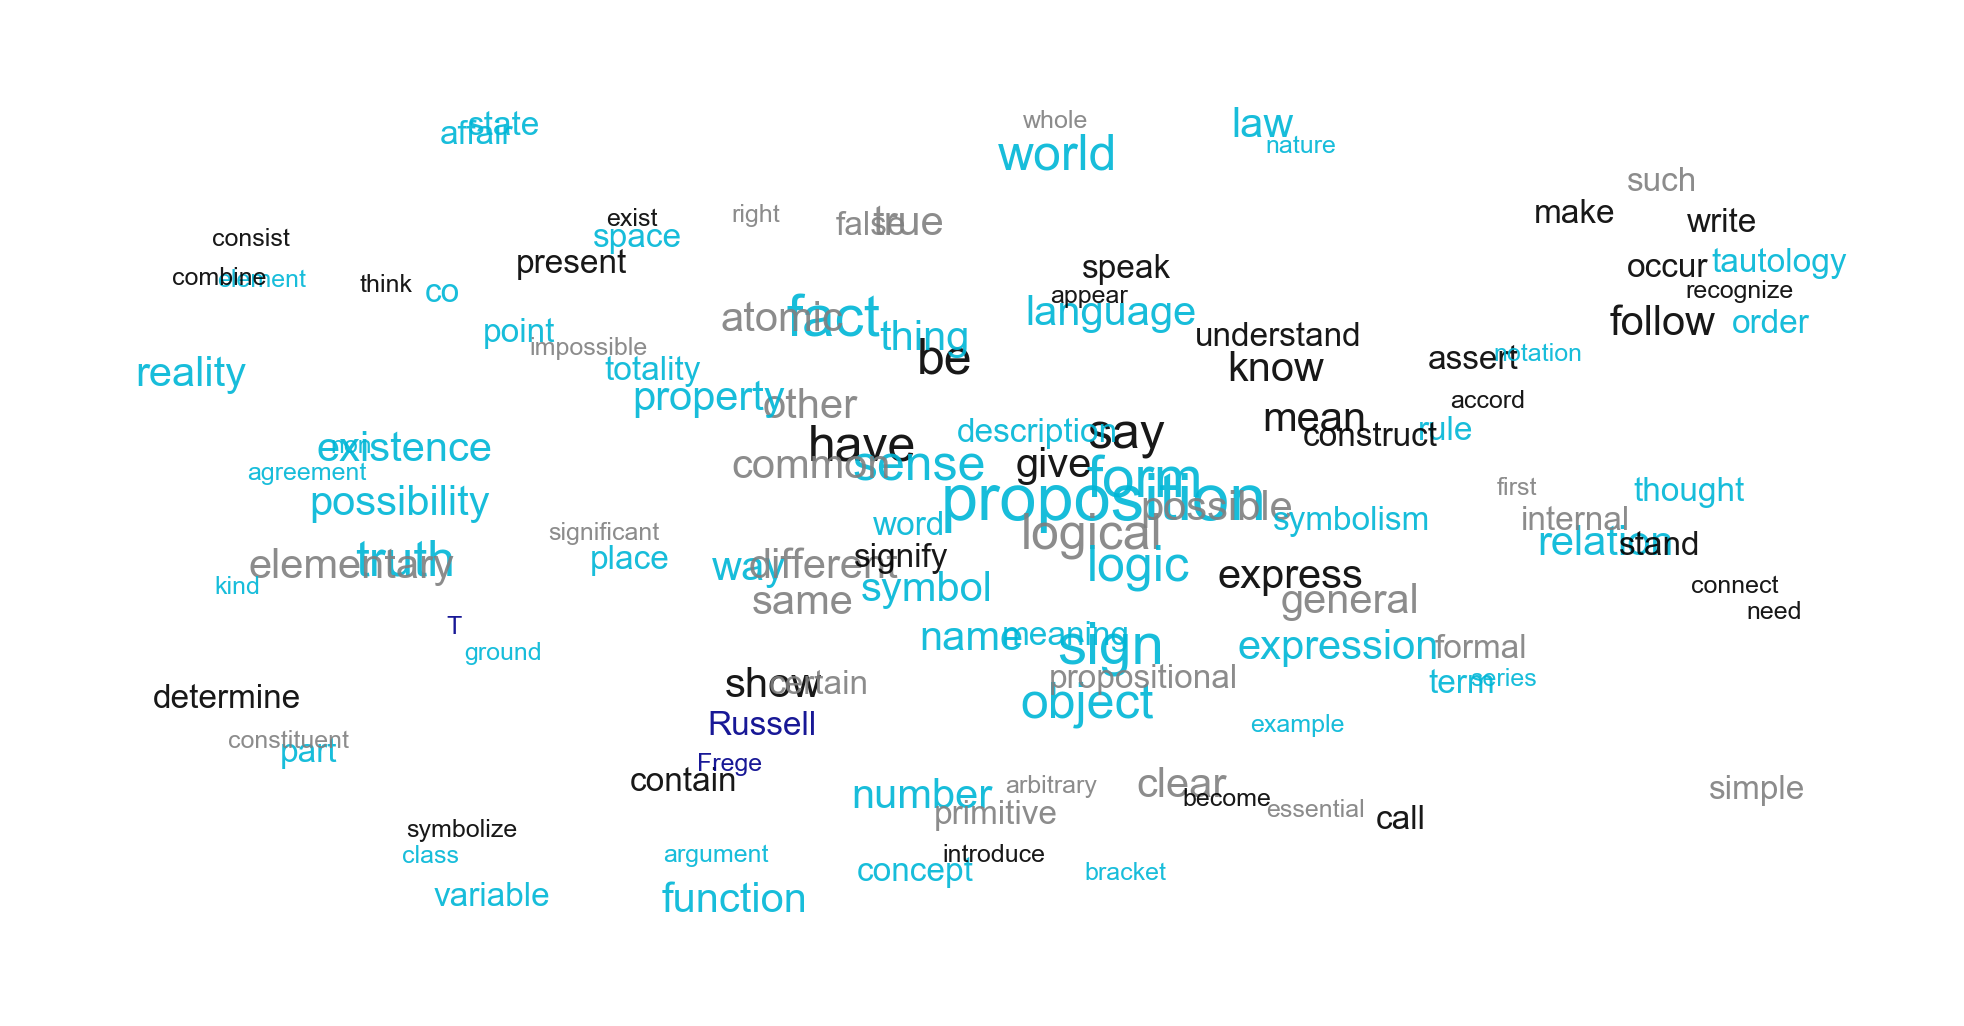

In [186]:
xs, ys, words = ppmi_svd.get_tsne_coors(word_vectors_df.loc[words_topn], perplexity=15)

fig, ax = plt.subplots(1,1, figsize=(3.967, 2), dpi=600, frameon=False)
cutoff = 0.1
border = 0.05
for x, y, word in zip(xs, ys, words):
    if (cutoff <= x <= 1-cutoff) and (cutoff <= y <= 1-cutoff):
        ax.text(x, y, word, horizontalalignment='center', fontsize=word_size_dict[word], color=word_color_dict[word], alpha=0.9)
ax.set_xlim(cutoff-border, 1-cutoff+border)
ax.set_ylim(cutoff-border, 1-cutoff+border)
#ax.set_facecolor("#F2F5FA")
ax.axis("off")
#ax.add_artist(ax.patch)
#ax.patch.set_zorder(-1)

In [187]:
fig.savefig("../figures/embeddings_witt_v4.png")

# Aristotle

In [188]:
dct = pickle.load(open("../data/arist_dct.pickle", "rb"))
corpus = pickle.load(open("../data/arist_corpus.pickle", "rb"))
freqs = pickle.load(open("../data/arist_freqs.pickle", "rb"))
#word_tag_dict = pickle.load(open("tlp_word_tag_dict.pickle", "rb"))

In [189]:
vocabulary = [tup[0] for tup in freqs][:2000]

In [190]:
cooc, vocabulary, pmi_matrix, word_vectors_df, pmi_svd_cos = ppmi_svd.from_bows_to_embeddings(corpus, dct, vocabulary=vocabulary)

In [191]:
cooc.shape

(2000, 2000)

In [192]:
word_size_dict = dict([(k, np.round(np.log2(v) / 3)) for k,v in freqs])

In [193]:
word_size_dict

{'εἰμί': 5.0,
 'οὗτος': 4.0,
 'ἔχω': 4.0,
 'λέγω': 4.0,
 'γίγνομαι': 4.0,
 'πᾶς': 4.0,
 'οἷος': 4.0,
 'ἄλλος': 4.0,
 'πολύς': 4.0,
 'αὐτός': 4.0,
 'ὑπάρχω': 4.0,
 'ποιέω': 4.0,
 'ἕτερος': 4.0,
 'τοιοῦτος': 4.0,
 'λόγος': 4.0,
 'δεῖ': 4.0,
 'τὶς': 4.0,
 'οὐδείς': 4.0,
 'ἀγαθός': 4.0,
 'φύσις': 4.0,
 'πρῶτος': 4.0,
 'ἕκαστος': 4.0,
 'ἀρχή': 4.0,
 'ἀνάγκη': 4.0,
 'ἄνθρωπος': 4.0,
 'γένος': 4.0,
 'κινέω': 3.0,
 'δοκέω': 3.0,
 'φημί': 3.0,
 'μέγας': 3.0,
 'συμβαίνω': 3.0,
 'μόνος': 3.0,
 'εἷς': 3.0,
 'σῶμα': 3.0,
 'κίνησις': 3.0,
 'β': 3.0,
 'πρότερος': 3.0,
 'ἐνδέχομαι': 3.0,
 'λαμβάνω': 3.0,
 'δῆλος': 3.0,
 'εἶδος': 3.0,
 'ἀναγκαῖος': 3.0,
 'χρόνος': 3.0,
 'ἐναντίος': 3.0,
 'μέρος': 3.0,
 'φανερός': 3.0,
 'φαίνω': 3.0,
 'τόπος': 3.0,
 'ζῷον': 3.0,
 'οὐσία': 3.0,
 'μέσος': 3.0,
 'τρόπος': 3.0,
 'ἴδιος': 3.0,
 'ἀδύνατος': 3.0,
 'ἑαυτοῦ': 3.0,
 'ἀρετή': 3.0,
 'μηδείς': 3.0,
 'δύναμις': 3.0,
 'ἅπας': 3.0,
 'γῆ': 3.0,
 'ἔνιοι': 3.0,
 'ὅσος': 3.0,
 'ἐπιστήμη': 3.0,
 'ὕδωρ': 3.0,
 'ἀριθμός': 3.0

In [194]:
resp = requests.get("https://sciencedata.dk/public/164bd4b21e23faeb39221fb2ad03f16a/morpheus_dict.json")
morpheus_dict = resp.json()

In [195]:
vocab_tags = []
tags_dict = {"n" : "NOUN",
             "a" : "ADJ",
             "v" : "VERB",}
for w in vocabulary:
    try:
        tags_raw = [d["p"][0] for d in morpheus_dict[w]]
        tags = [tags_dict[t] for t in tags_raw if t in ["n", "a", "v"]][0]
        vocab_tags.append((w, tags))
    except:
        vocab_tags.append((w, "PROPN"))
word_tag_dict = dict(vocab_tags)

In [196]:
word_color_dict = {}
for k,v in word_tag_dict.items():
    word_color_dict[k] = tag_color_dict[v]

(0.26, 0.74, 0.26, 0.74)

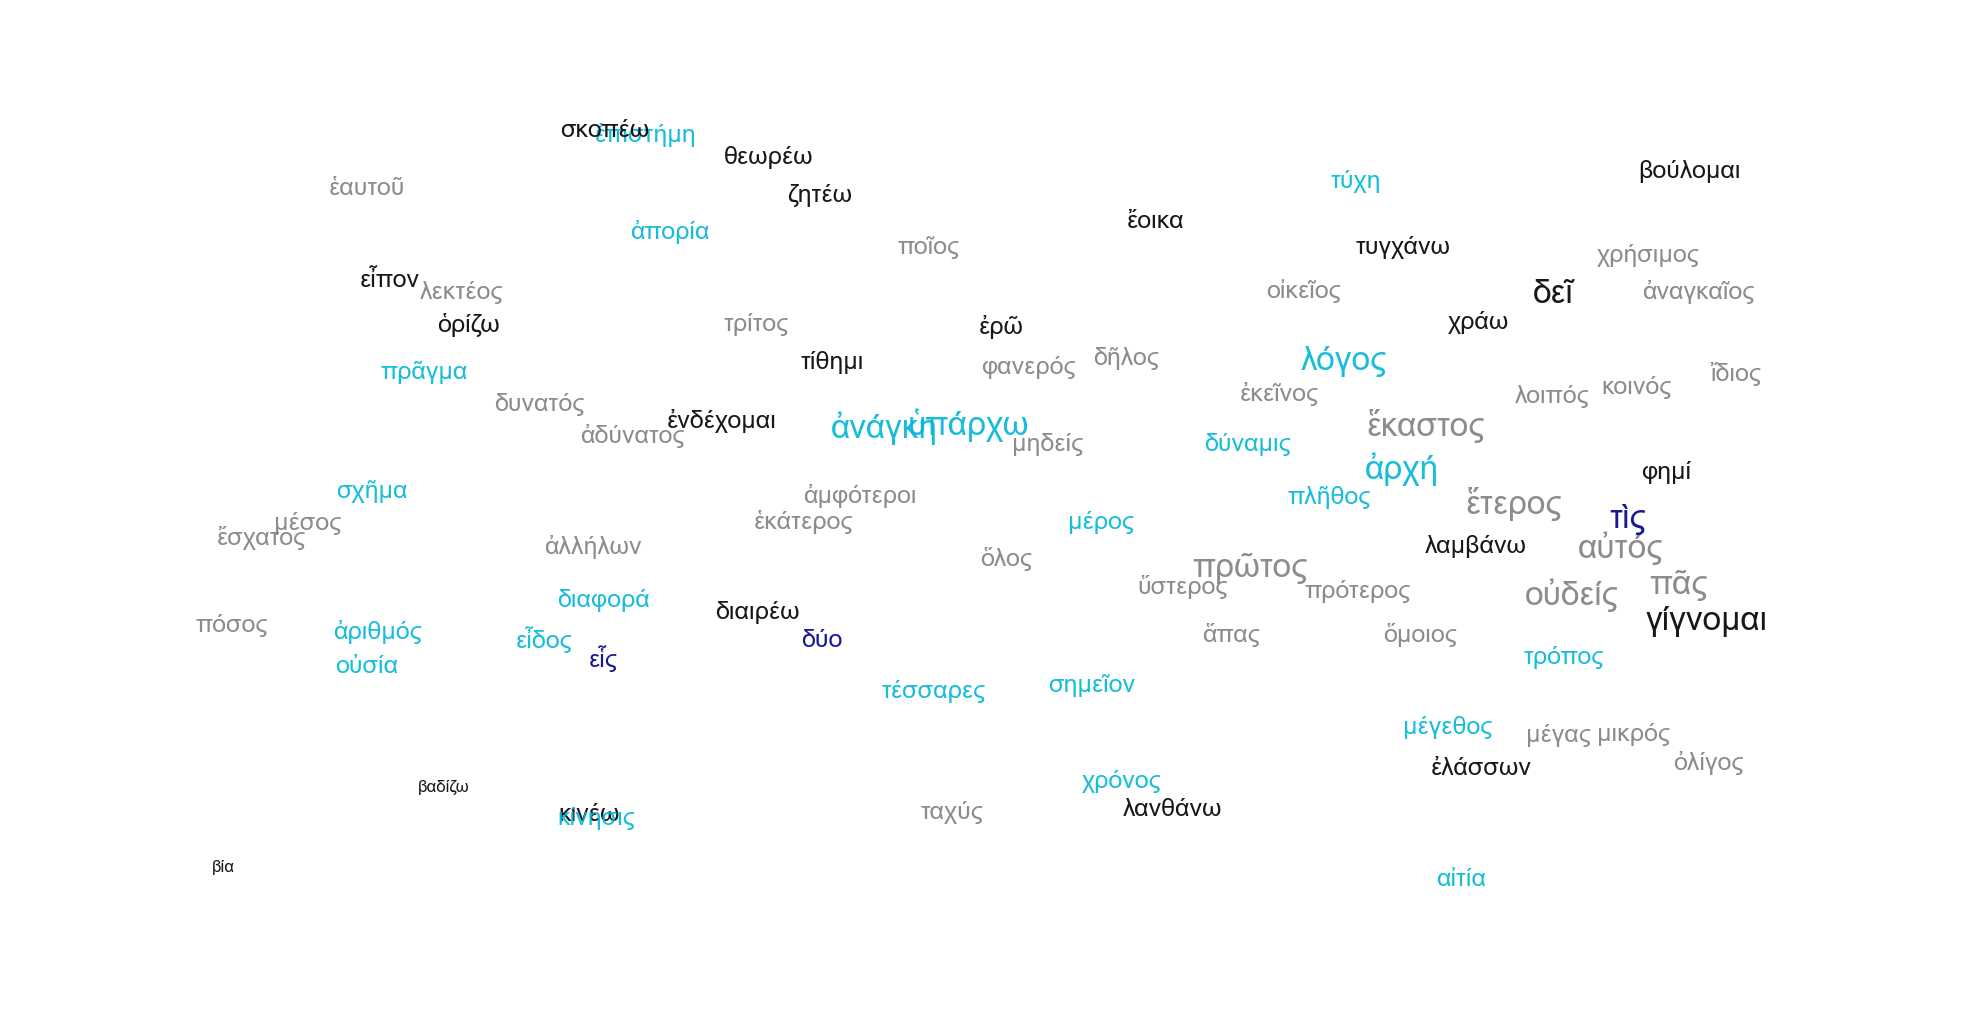

In [199]:
topn = 300
xs, ys, words = ppmi_svd.get_tsne_coors(word_vectors_df[:topn])

fig, ax = plt.subplots(1,1, figsize=(3.967, 2), dpi=600, frameon=False)
cutoff = 0.3
border = 0.04
for x, y, word in zip(xs, ys, words):
    if (cutoff <= x <= 1-cutoff) and (cutoff <= y <= 1-cutoff):
        ax.text(x, y, word, horizontalalignment='center', fontsize=word_size_dict[word], color=word_color_dict[word], alpha=0.9)
ax.set_xlim(cutoff-border, 1-cutoff+border)
ax.set_ylim(cutoff-border, 1-cutoff+border)
ax.axis("off")

In [200]:
fig.savefig("../figures/embeddings_arist_v1.png", dpi=600)

In [226]:
nodes_dict = dict(zip(range(len(vocabulary)), [{"wordcount": n} for n in cooc.diagonal()]))

In [230]:
labels_mapping = dict(zip(range(len(vocabulary)), vocabulary))

In [231]:
G = nx.from_numpy_matrix(cooc)
G.remove_edges_from(nx.selfloop_edges(G))
nx.set_node_attributes(G, nodes_dict)
G = nx.relabel_nodes(G, labels_mapping)

In [244]:
[np.log(s) for s in [2, 4, 10, 13, 5]]

[0.6931471805599453,
 1.3862943611198906,
 2.302585092994046,
 2.5649493574615367,
 1.6094379124341003]

In [245]:
def plot_network(G, N_nodes=50, node_size_attr="wordcount", edge_width_attr="weight", size_coef = 10, margins = 0.2, legend_dict=None,ax=None):
    nodes_sorted_tups =  node_sizes = sorted([(node[0], node[1][node_size_attr]) for node in G.nodes(data=True)], key=lambda x: x[1], reverse=True)
    nodes_lables_sorted = [tup[0] for tup in nodes_sorted_tups]
    H = G.subgraph(nodes_lables_sorted[:N_nodes])
    node_colors = [word_color_dict[node] for node in H.nodes()]
    node_sizes = [np.log(w) for w in nx.get_node_attributes(H, node_size_attr).values()]
    max_size = np.max(node_sizes)
    node_sizes = [(s / max_size) * size_coef for s in node_sizes]
    edge_sizes = [np.log2(w*5) for w in nx.get_edge_attributes(H, edge_width_attr).values()]
    pos = nx.kamada_kawai_layout(H) # generate the node positions
    if ax == None:
        fig, ax = plt.subplots()
    x_min, x_max, y_min, y_max = np.min([p[0] for p in pos.values()]), np.max([p[0] for p in pos.values()]), np.min([p[1] for p in pos.values()]), np.max([p[1] for p in pos.values()])
    ax.set_xlim(x_min - margins, x_max + margins)
    #ax.set_ylim(y_min - margins, y_max + margins)
    ax.set_axis_off()
    layer_edges = nx.draw_networkx_edges(H,
                                         pos=pos,
                                         alpha=0.5,
                                         width= edge_sizes,
                                         style="solid",
                                         edge_color="gray",
                                         ax=ax)
    layer_nodes = nx.draw_networkx_nodes(H,
                                         pos=pos,
                                         node_size=node_sizes,
                                         node_color=node_colors,
                                         ax=ax)
    layer_labels = nx.draw_networkx_labels(H,
                                           pos=pos,
                                           font_size=8,
                                           ax=ax)
    if legend_dict != None:
        markers = [plt.Line2D([0,0],[0,0], marker="o", color=color, lw=0) for color in legend_dict.values()]
        ax.legend(markers, legend_dict.keys(), bbox_to_anchor=(0, 0), loc='upper left', frameon=False)
    layers = [layer_edges, layer_nodes, layer_labels]
    return layers

 {'ἔχω': Text(0.002968442689545079, -0.09433008303162704, 'ἔχω'),
  'ἐλάσσων': Text(0.009190513694533265, 0.015345256205740029, 'ἐλάσσων'),
  'ἐκεῖνος': Text(0.00540049873624866, -0.010717369865481193, 'ἐκεῖνος'),
  'ἀήρ': Text(-0.011117955754069707, 0.017261682884059507, 'ἀήρ'),
  'πρῶτος': Text(-0.0273421800482211, 0.011983450129479272, 'πρῶτος'),
  'ἄλλος': Text(0.10880498913206559, -0.04265355107946373, 'ἄλλος'),
  'καλός': Text(0.003369742204914371, 0.01340082728138346, 'καλός'),
  'τέλος': Text(-0.004042072258776547, 0.004933291718381688, 'τέλος'),
  'κοινός': Text(-0.0075324999442191514, 0.02823475527064238, 'κοινός'),
  'κίνησις': Text(0.014313557540237562, 0.015654144940240564, 'κίνησις'),
  'οὐσία': Text(0.006328094198904451, 0.0004984298873620072, 'οὐσία'),
  'εἷς': Text(0.0029985334363233406, -0.002241802914262965, 'εἷς'),
  'ὅμοιος': Text(-0.011048087200817947, 0.004090488426141589, 'ὅμοιος'),
  'ἐπιστήμη': Text(0.0014460186974961798, 0.024292547682907808, 'ἐπιστήμη'),
  '

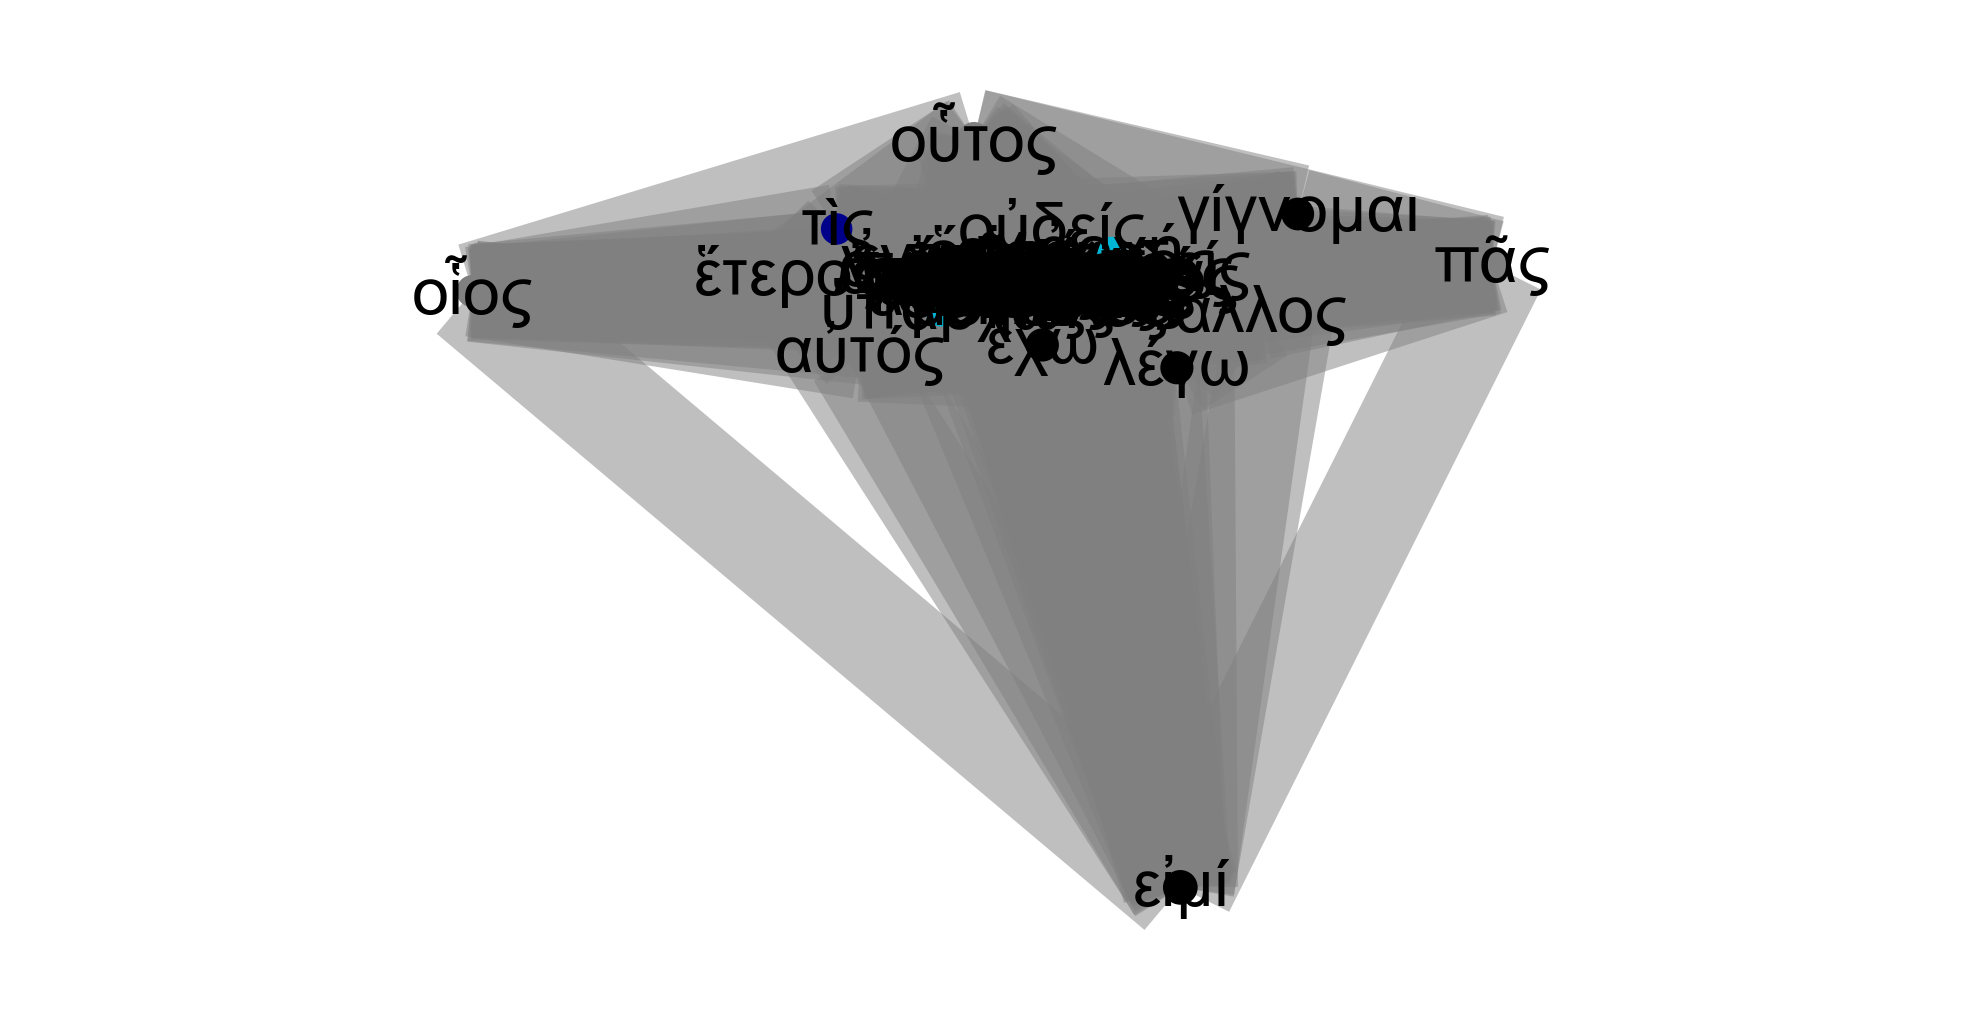

In [246]:
fig, ax = plt.subplots(figsize=(3.967, 2), dpi=600, frameon=False)
plot_network(G, N_nodes=100, ax=ax)#, legend_dict=hisco_colors_dict, ax=ax)